**Baltimore City Building Utility Data Project**

This exercise will support DGS by identifying energy usage among City public buildings.

In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/content'

In [3]:
directory = r'/content/EUI Calc.xlsx'
sheetname = 'Data'

In [4]:
df = pd.read_excel(directory, sheet_name = sheetname)

In [5]:
df.head()

,bl_id,building_name,address,utility,charge,consump_month,consump_year,bge_kWh_used,bge_therms_used,const_consumption_therms,wgl_usage
0,B00038,Pimlico Academy Public Safety Training Fire Fa...,3500 West Northern Parkway,bge,3765.44,6,2019,119323.0,307.0,NaN,NaN
1,B00016,Baltimore City Police North Western District R...,5271 Reisterstown Rd,bge,71.36,6,2019,0.0,44.0,NaN,NaN
2,B00183,Reservoir Hill / Metro Delta Head Start,2001 Park Av,bge,538.29,6,2019,4500.0,0.0,NaN,NaN
3,B00031,Baltimore City Police Western District,1034 N Mount St,bge,1197.94,6,2019,27200.0,30.0,NaN,NaN
4,B00102,Druid Health District Building,1515 W North Av,bge,1722.29,6,2019,51751.0,153.0,NaN,NaN


In [6]:
series_power = df.groupby("building_name")["bge_kWh_used"].sum()
series_heat = df.groupby("building_name")["bge_therms_used"].sum()

In [7]:
series_heat

building_name
1200 Health Clinic                                                                         35091.0
2492 Giles Road                                                                                0.0
6200 Pulaski Highway Bridge Maintenace Garage/Workshop                                         0.0
Baltimore City Mounted Police Unit                                                             0.0
Baltimore City Police Central District                                                         0.0
Baltimore City Police Department Warrant Task Force                                        16513.0
Baltimore City Police North Eastern District                                               33068.0
Baltimore City Police North Western District                                                   0.0
Baltimore City Police North Western District Radio Tower                                   23012.0
Baltimore City Police Northern District                                                    3005

In [8]:
data = pd.concat([series_power, series_heat], axis=1)

In [9]:
data.columns = ['bge_kWh_used (kWh)', 'bge_therms_used (?)']

In [29]:
data.head(3)

,bge_kWh_used (kWh),bge_therms_used (?),bge_kWh_used (Converted kwh),bge_therms_used (Converted therms),Total BTU,Sq ft,lon,lat,Site EUI
Pimlico Academy Public Safety Training Fire Facility,2691477.0,332634.0,9.183320e+06,33263400.0,4.244672e+07,NaN,NaN,NaN,NaN
First Mariner Arena,9075860.0,17261.0,3.096683e+07,1726100.0,3.269293e+07,697620.0,-76.61862,39.28862,46.863528
Fleet Central Garage Main Building,2335041.0,196603.0,7.967160e+06,19660300.0,2.762746e+07,105914.0,-76.56612,39.30612,260.848046


In [11]:
power_factor = 3.412

data['bge_kWh_used (Converted kwh)'] = data['bge_kWh_used (kWh)'] * power_factor

In [12]:
data.head()

,bge_kWh_used (kWh),bge_therms_used (?),bge_kWh_used (Converted kwh)
building_name,,,
1200 Health Clinic,816415.0,35091.0,2785607.980
2492 Giles Road,771794.0,0.0,2633361.128
6200 Pulaski Highway Bridge Maintenace Garage/Workshop,146182.0,0.0,498772.984
Baltimore City Mounted Police Unit,209966.0,0.0,716403.992
Baltimore City Police Central District,0.0,0.0,0.000


In [13]:
heat_factor = 100

data['bge_therms_used (Converted therms)'] = data['bge_therms_used (?)'] * heat_factor

In [14]:
data.head()

,bge_kWh_used (kWh),bge_therms_used (?),bge_kWh_used (Converted kwh),bge_therms_used (Converted therms)
building_name,,,,
1200 Health Clinic,816415.0,35091.0,2785607.980,3509100.0
2492 Giles Road,771794.0,0.0,2633361.128,0.0
6200 Pulaski Highway Bridge Maintenace Garage/Workshop,146182.0,0.0,498772.984,0.0
Baltimore City Mounted Police Unit,209966.0,0.0,716403.992,0.0
Baltimore City Police Central District,0.0,0.0,0.000,0.0


In [15]:
#del data['bge_therms_used (Converted kwh)']

In [16]:
data.head()

,bge_kWh_used (kWh),bge_therms_used (?),bge_kWh_used (Converted kwh),bge_therms_used (Converted therms)
building_name,,,,
1200 Health Clinic,816415.0,35091.0,2785607.980,3509100.0
2492 Giles Road,771794.0,0.0,2633361.128,0.0
6200 Pulaski Highway Bridge Maintenace Garage/Workshop,146182.0,0.0,498772.984,0.0
Baltimore City Mounted Police Unit,209966.0,0.0,716403.992,0.0
Baltimore City Police Central District,0.0,0.0,0.000,0.0


In [17]:
#•	Total BTU = BTU electric + BTU gas

data['Total BTU'] = data['bge_kWh_used (Converted kwh)'] + data['bge_therms_used (Converted therms)']

In [18]:
data.head()

,bge_kWh_used (kWh),bge_therms_used (?),bge_kWh_used (Converted kwh),bge_therms_used (Converted therms),Total BTU
building_name,,,,,
1200 Health Clinic,816415.0,35091.0,2785607.980,3509100.0,6294707.980
2492 Giles Road,771794.0,0.0,2633361.128,0.0,2633361.128
6200 Pulaski Highway Bridge Maintenace Garage/Workshop,146182.0,0.0,498772.984,0.0,498772.984
Baltimore City Mounted Police Unit,209966.0,0.0,716403.992,0.0,716403.992
Baltimore City Police Central District,0.0,0.0,0.000,0.0,0.000


In [19]:
df2 = pd.read_excel(directory, sheet_name = "coded buildings")

In [20]:
area = df2.groupby('name')['Sq ft'].sum()
long = df2.groupby('name')['lon'].sum()
lat = df2.groupby('name')['lat'].sum()

In [21]:
df_gps = pd.concat([area, long, lat], axis = 1)

In [22]:
df_gps.head()

,Sq ft,lon,lat
name,,,
1812 Museum 1957 Building,3171.65,-76.60334,39.28750
1812 Museum Flag House Building,12685.55,-76.60333,39.28751
2492 Giles Road,20693.00,-76.63066,39.25330
4601 East Monument Transitional Shelter,17400.00,-76.55806,39.29945
Babe Ruth Birthplace and Orioles Museum,7742.00,-76.62481,39.28557


In [23]:
data = pd.concat([data, df_gps], axis=1)

In [24]:
data.head()

,bge_kWh_used (kWh),bge_therms_used (?),bge_kWh_used (Converted kwh),bge_therms_used (Converted therms),Total BTU,Sq ft,lon,lat
1200 Health Clinic,816415.0,35091.0,2785607.980,3509100.0,6294707.980,NaN,NaN,NaN
2492 Giles Road,771794.0,0.0,2633361.128,0.0,2633361.128,20693.00,-76.63066,39.25330
6200 Pulaski Highway Bridge Maintenace Garage/Workshop,146182.0,0.0,498772.984,0.0,498772.984,NaN,NaN,NaN
Baltimore City Mounted Police Unit,209966.0,0.0,716403.992,0.0,716403.992,11270.59,-76.61028,39.29556
Baltimore City Police Central District,0.0,0.0,0.000,0.0,0.000,56228.00,-76.60854,39.29000


In [25]:
data['Site EUI'] = data['Total BTU'] / data['Sq ft']

In [26]:
data.head()

,bge_kWh_used (kWh),bge_therms_used (?),bge_kWh_used (Converted kwh),bge_therms_used (Converted therms),Total BTU,Sq ft,lon,lat,Site EUI
1200 Health Clinic,816415.0,35091.0,2785607.980,3509100.0,6294707.980,NaN,NaN,NaN,NaN
2492 Giles Road,771794.0,0.0,2633361.128,0.0,2633361.128,20693.00,-76.63066,39.25330,127.258548
6200 Pulaski Highway Bridge Maintenace Garage/Workshop,146182.0,0.0,498772.984,0.0,498772.984,NaN,NaN,NaN,NaN
Baltimore City Mounted Police Unit,209966.0,0.0,716403.992,0.0,716403.992,11270.59,-76.61028,39.29556,63.564019
Baltimore City Police Central District,0.0,0.0,0.000,0.0,0.000,56228.00,-76.60854,39.29000,0.000000


In [27]:
data.sort_values(by = 'Total BTU', ascending = False, inplace = True)

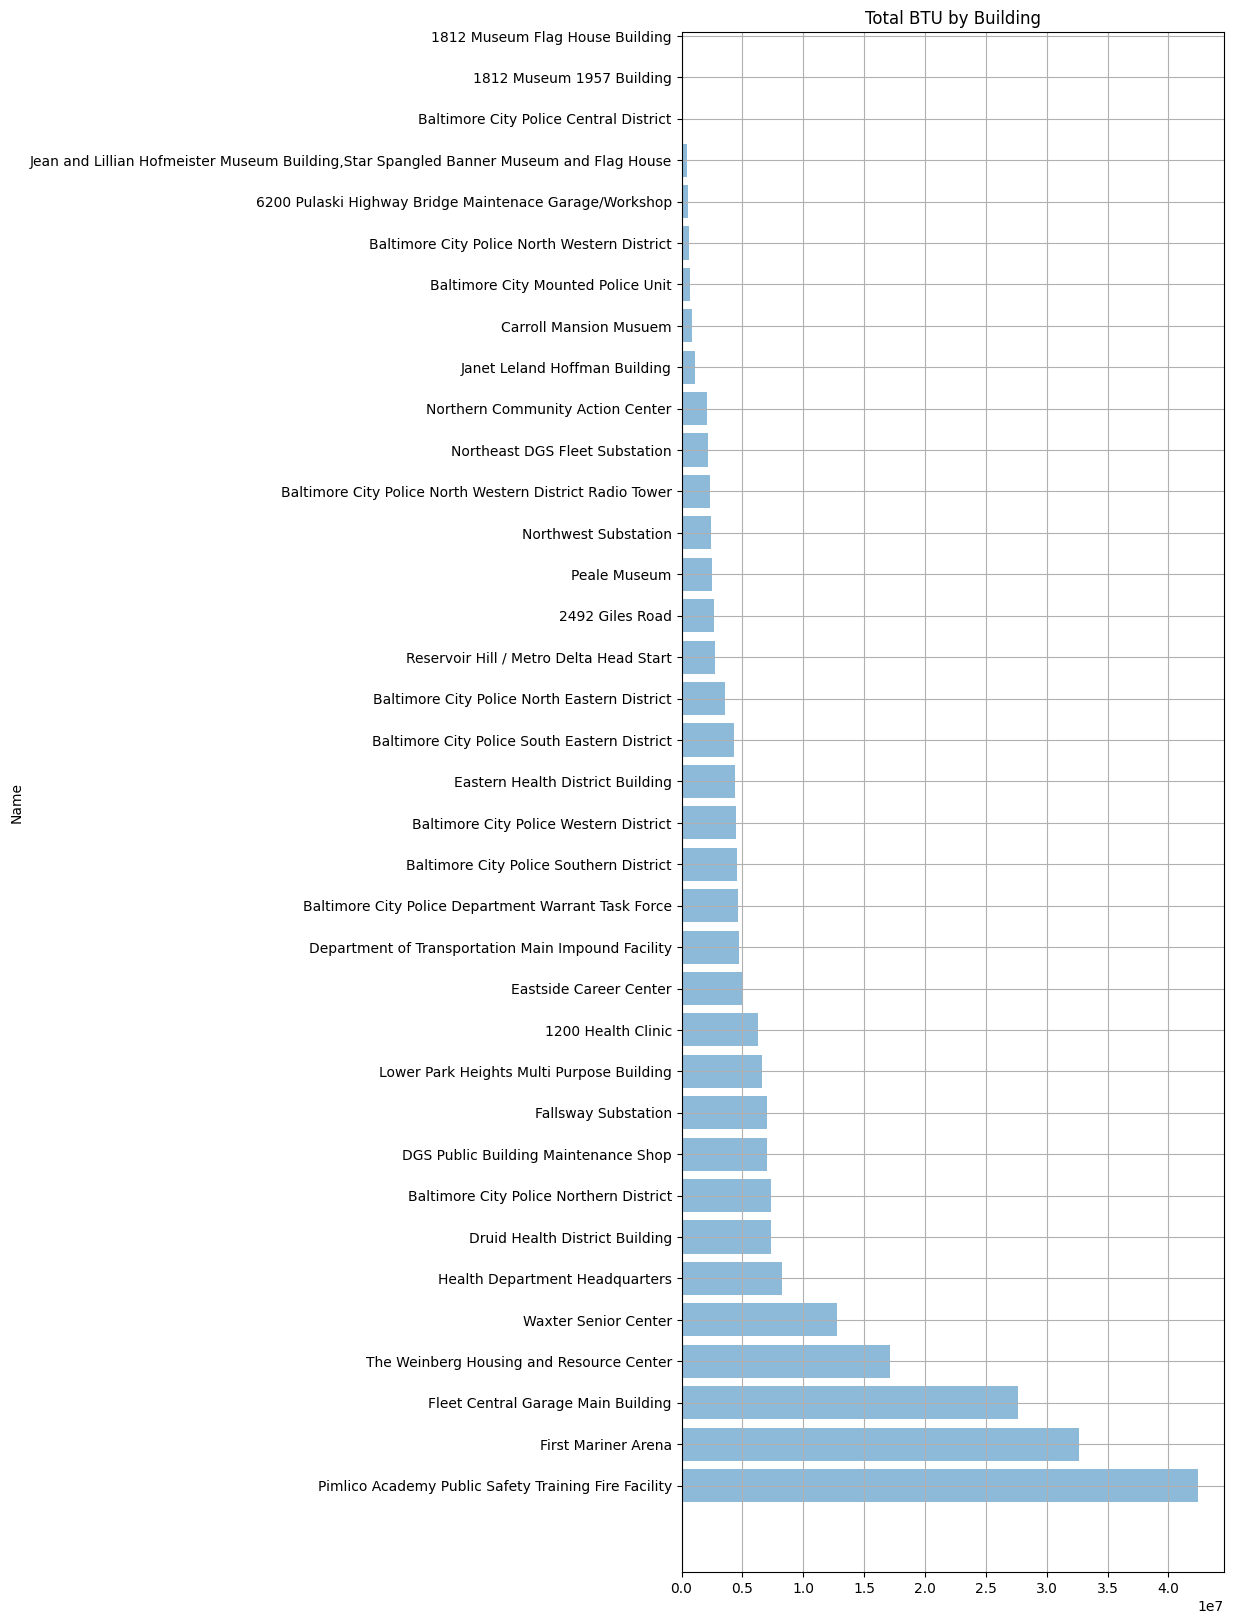

In [28]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

plt.figure(figsize =(7, 20))
plt.barh(data.index, data['Total BTU'], alpha=0.5)
#plt.xticks(y_pos, objects)
plt.ylabel('Name')
plt.title('Total BTU by Building')
plt.grid()

plt.show()